In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow --user


Note: you may need to restart the kernel to use updated packages.


In [4]:
import datetime
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential, Model, load_model
from keras.layers import Input ,Dense, Dropout, Activation, LSTM, Conv1D
from keras.layers import Lambda, Convolution1D, MaxPooling1D, Flatten, Reshape, BatchNormalization
from keras.layers.wrappers import TimeDistributed
from keras.layers.pooling import GlobalAveragePooling1D
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.metrics import categorical_crossentropy, binary_crossentropy

#from spp.SpatialPyramidPooling import SpatialPyramidPooling

#For data saving
import pickle
import random
#other imports
import gzip
import glob
import os
import keras.backend as K
import os
import time 
#cwd = os.path.dirname(os.path.realpath("SURF_001_TwoClass13.ipynb"))

In [5]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from collections import defaultdict
import numpy as np
import pandas as pd
import random
# read names and postions from bed file
positions = defaultdict(list)
extra = []
with open('../../Data/Seq_indexes.bed') as f:
    for line in f:
        name, start, stop, label = line.split()
        extra.append(label)
        positions[name].append((int(start), int(stop), label))

# parse faste file and turn into dictionary
records = SeqIO.to_dict(SeqIO.parse(open('../../Data/chr1.fa'), 'fasta'))

In [6]:
import matplotlib.pyplot as plt
import numpy as np

Extracting Fasta to tabular
https://stackoverflow.com/questions/30503543/python-extract-dna-sequence-from-fasta-file-using-bed-file
https://biopython.org/wiki/SeqIO

[25, 17, 8, 7, 19, 21, 5, 15, 12, 16, 24, 2, 1, 6, 23, 3, 4, 22, 14, 13, 10, 20, 11, 18, 9]
[168080, 106359, 78895, 47756, 44035, 37291, 33690, 30854, 23960, 21534, 20941, 19399, 15326, 15247, 15066, 13707, 11127, 10407, 8313, 7537, 6177, 4995, 4088, 3850, 2875]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[15326, 19399, 13707, 11127, 33690, 15247, 47756, 78895, 2875, 6177, 4088, 23960, 7537, 8313, 30854, 21534, 106359, 3850, 44035, 4995, 37291, 10407, 15066, 20941, 168080]


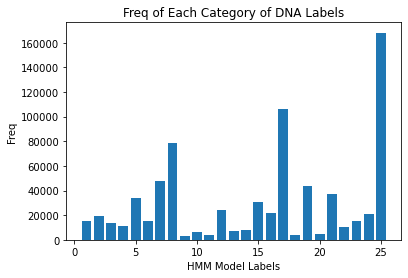

Total Num Seq: 751509


In [18]:
labels = df_data['labels'].value_counts()
labels_num = (labels.index).tolist()
labels_freq = labels.tolist()
print(labels_num)
print(labels_freq)
count = 0
for x, y in sorted(zip(labels_num, labels_freq)):
    labels_num[count] = x
    labels_freq[count] = y 
    count += 1
print(labels_num)
print(labels_freq)

labels = labels_num

plt.bar(labels_num,labels_freq, align = 'center')
plt.ylabel('Freq')
plt.xlabel('HMM Model Labels')
plt.title('Freq of Each Category of DNA Labels')
plt.show()
print("Total Num Seq: " + str(sum(labels_freq)))

In [185]:
chromosomes = []
for i in range(1, 23):
    chromosomes.append('chr' + str(i))
chromosomes.append('chrX')
print(chromosomes)

print(positions[chromosomes[0]][0])

['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
(10000, 10600, '21_Het')


In [17]:
'''
# Checking which Letters are in the Sequences
letters = {}
for seq in df['seq'].values:
    if len(seq) < 1000:
        for letter in seq:
            if letter not in letters:
                letters[letter] = 1
print(letters)
'''

"\n# Checking which Letters are in the Sequences\nletters = {}\nfor seq in df['seq'].values:\n    if len(seq) < 1000:\n        for letter in seq:\n            if letter not in letters:\n                letters[letter] = 1\nprint(letters)\n"

In [7]:
def save_file(name, df):
    df.to_csv(name
         , sep='|'
         , header=True
         , index=False
         , chunksize=100000
         , compression='gzip'
         , encoding='utf-8')

### Opening the Datafiles 
###### And making sequences lowercase

In [49]:
def get_data():
    d = {}
    count = 0

    for chrom in chromosomes:
        records = SeqIO.to_dict(SeqIO.parse(open('../../Data/' + (chrom) + '.fa'), 'fasta'))
        long_seq_record = records[chrom]
        long_seq = long_seq_record.seq
        chrom_seq = str(long_seq)
        for (start, stop, label) in positions[chrom]:
            d[count] = {"chrom": chrom, "seq": chrom_seq[start-1:stop], "label": label}
            count += 1
    df = df.from_dict(d, "index")
    print(df)
    return df
df = get_data()

       chrom                                                seq     label
0       chr1  Ntaaccctaaccctaaccctaaccctaaccctaaccctaaccctaa...    21_Het
1       chr1  tgaggagaacgcaactccgccgttgcaaaggcgcgccgcgccggcg...  25_Quies
2       chr1  ATCTTATCTTTATATGATTCCCTTGCTGCCTGGAGATTGACATTTC...  25_Quies
3       chr1  ATTAAGTACACATCTTATTTTCCAGTGATAATGCTACCGGCAAATT...  25_Quies
4       chr1  GCCTGATTCATGGCTgaaatcacgtttgaccagctatgtgtgtctc...  25_Quies
...      ...                                                ...       ...
751504  chrX  ATCTCTCTCAAATTGACCTAATTGGTTTCATTCTCAGCAAAATGAC...    21_Het
751505  chrX  CCCCTGTTCACCTCAGCCCTGCACCCTTTCACCCTCCTGTAAGCCC...  25_Quies
751506  chrX  gtgtgtgtatgtctgtgtgtgtgtgtttatgtgtgtgtgtctgtgt...    21_Het
751507  chrX  tttgtgtgtgtgtgtctcgtgtgtgtgtgtctgtgtgtatctgtgt...  25_Quies
751508  chrX  ttggggttggggttggggttagggtttgggtttagggttggggtag...    21_Het

[751509 rows x 3 columns]


In [51]:
# Saving the data
df.to_csv('output_123.csv.gz'
         , sep='|'
         , header=True
         , index=False
         , chunksize=100000
         , compression='gzip'
         , encoding='utf-8')

In [112]:
print(df)
def to_lower(df):
    """
    Makes all the sequences in the df lowercase
    
    @return df with lowercase 'seq' column
    """
    count = 0
    for i in range(len(df['seq'].values)):
        if i == 2:
            print(df['seq'][i])
        df['seq'][i] = df['seq'][i].lower()
        count += 1
    return df
df = to_lower(df)
print(df)

       chrom                                                seq     label
0       chr1  ntaaccctaaccctaaccctaaccctaaccctaaccctaaccctaa...    21_Het
1       chr1  tgaggagaacgcaactccgccgttgcaaaggcgcgccgcgccggcg...  25_Quies
2       chr1  atcttatctttatatgattcccttgctgcctggagattgacatttc...  25_Quies
3       chr1  attaagtacacatcttattttccagtgataatgctaccggcaaatt...  25_Quies
4       chr1  gcctgattcatggctgaaatcacgtttgaccagctatgtgtgtctc...  25_Quies
...      ...                                                ...       ...
751504  chrX  ATCTCTCTCAAATTGACCTAATTGGTTTCATTCTCAGCAAAATGAC...    21_Het
751505  chrX  CCCCTGTTCACCTCAGCCCTGCACCCTTTCACCCTCCTGTAAGCCC...  25_Quies
751506  chrX  gtgtgtgtatgtctgtgtgtgtgtgtttatgtgtgtgtgtctgtgt...    21_Het
751507  chrX  tttgtgtgtgtgtgtctcgtgtgtgtgtgtctgtgtgtatctgtgt...  25_Quies
751508  chrX  ttggggttggggttggggttagggtttgggtttagggttggggtag...    21_Het

[751509 rows x 3 columns]
atcttatctttatatgattcccttgctgcctggagattgacatttccttggggataatctggtcataggattggtgaaggtggaa

In [114]:
# Save the lower case sequence
save_file('genome_lower.csv.gz')

### Opening the lower case Seq

In [6]:
df = pd.read_csv('../../Data/genome_lower.csv.gz', compression='gzip', sep ="|")

In [7]:
print(df)

       chrom                                                seq     label
0       chr1  ntaaccctaaccctaaccctaaccctaaccctaaccctaaccctaa...    21_Het
1       chr1  tgaggagaacgcaactccgccgttgcaaaggcgcgccgcgccggcg...  25_Quies
2       chr1  atcttatctttatatgattcccttgctgcctggagattgacatttc...  25_Quies
3       chr1  attaagtacacatcttattttccagtgataatgctaccggcaaatt...  25_Quies
4       chr1  gcctgattcatggctgaaatcacgtttgaccagctatgtgtgtctc...  25_Quies
...      ...                                                ...       ...
751504  chrX  atctctctcaaattgacctaattggtttcattctcagcaaaatgac...    21_Het
751505  chrX  cccctgttcacctcagccctgcaccctttcaccctcctgtaagccc...  25_Quies
751506  chrX  gtgtgtgtatgtctgtgtgtgtgtgtttatgtgtgtgtgtctgtgt...    21_Het
751507  chrX  tttgtgtgtgtgtgtctcgtgtgtgtgtgtctgtgtgtatctgtgt...  25_Quies
751508  chrX  ttggggttggggttggggttagggtttgggtttagggttggggtag...    21_Het

[751509 rows x 3 columns]


### Changing Labels to Numbers

In [8]:
labels_25 = {'1_TssA': 1, '2_PromU': 2, '3_PromD1':3, '4_PromD2':4, "5_Tx5'":5, '6_Tx':6, \
          "7_Tx3'":7, '8_TxWk':8, '9_TxReg':9, "10_TxEnh5'":10, "11_TxEnh3'":11, '12_TxEnhW':12, \
          '13_EnhA1':13, '14_EnhA2':14, '15_EnhAF':15, '16_EnhW1':16, '17_EnhW2':17, '18_EnhAc':18,\
          '19_DNase':19, '20_ZNF/Rpts':20, '21_Het':21, '22_PromP':22, '23_PromBiv':23, \
          '24_ReprPC':24, '25_Quies':25}
print(len(labels_25))
from sklearn import preprocessing
labels = df['label'].values.tolist()
for i, label in enumerate(labels):
    labels[i] = labels_25[label]
print(labels[0:10])

25
[21, 25, 25, 25, 25, 19, 25, 25, 25, 19]


In [9]:
df_data = df.copy(deep=True)
print(df_data)
df_data.insert(loc=3, column='labels', value=labels)
df_data = df_data.drop(columns=['label'])
print(df_data)

       chrom                                                seq     label
0       chr1  ntaaccctaaccctaaccctaaccctaaccctaaccctaaccctaa...    21_Het
1       chr1  tgaggagaacgcaactccgccgttgcaaaggcgcgccgcgccggcg...  25_Quies
2       chr1  atcttatctttatatgattcccttgctgcctggagattgacatttc...  25_Quies
3       chr1  attaagtacacatcttattttccagtgataatgctaccggcaaatt...  25_Quies
4       chr1  gcctgattcatggctgaaatcacgtttgaccagctatgtgtgtctc...  25_Quies
...      ...                                                ...       ...
751504  chrX  atctctctcaaattgacctaattggtttcattctcagcaaaatgac...    21_Het
751505  chrX  cccctgttcacctcagccctgcaccctttcaccctcctgtaagccc...  25_Quies
751506  chrX  gtgtgtgtatgtctgtgtgtgtgtgtttatgtgtgtgtgtctgtgt...    21_Het
751507  chrX  tttgtgtgtgtgtgtctcgtgtgtgtgtgtctgtgtgtatctgtgt...  25_Quies
751508  chrX  ttggggttggggttggggttagggtttgggtttagggttggggtag...    21_Het

[751509 rows x 3 columns]
       chrom                                                seq  labels
0       chr1 

In [16]:
### This is just for making the df smaller for testing it out

df_1 = df_data.loc[df_data['labels'] == 13]
for i in range(100):
    df_1 = df_1.sample(frac = 1)
print(df_1)
df_1 = df_1.head(1000)
df_1

        chrom                                                seq  labels
223535   chr5  caggcctctgtgcattcttaggagtgcagactccatggcccagact...      13
232543   chr5  tccattgtttaaagcaaacatttcctctgactactcaatagtaaag...      13
174384   chr4  agcaccctacggcattcatgccatcatctaaacttcctgtgccgct...      13
504771  chr12  ggcttccagctgagcctgcatttttctttgacttccccctcttgcc...      13
369065   chr9  ctgtctcaaaaagaaaagagaaaaagaaaaaagcatgttccaggca...      13
...       ...                                                ...     ...
655288  chr19  gtggcctgggagcaccttcctgagacccctctgcccctcccaacgc...      13
243566   chr5  tgagattacccaggatttctcaaccagagatttctcttaccctcta...      13
358021   chr8  cttgcttacccttcagggatgctgtaagagccaattaaccatgggt...      13
181144   chr4  tactgtctatctcattaaatctccacaggtcctcactaacgctgtc...      13
717210  chr22  gacctggctgagctagtttatctcaaaaccagcacatgacttctag...      13

[7537 rows x 3 columns]


,chrom,seq,labels
223535,chr5,caggcctctgtgcattcttaggagtgcagactccatggcccagact...,13
232543,chr5,tccattgtttaaagcaaacatttcctctgactactcaatagtaaag...,13
174384,chr4,agcaccctacggcattcatgccatcatctaaacttcctgtgccgct...,13
504771,chr12,ggcttccagctgagcctgcatttttctttgacttccccctcttgcc...,13
369065,chr9,ctgtctcaaaaagaaaagagaaaaagaaaaaagcatgttccaggca...,13
...,...,...,...
381562,chr9,aaattgtggagaagtgacaagacaaggaaaatgtgtttgagcttct...,13
257273,chr6,ggctaggggaggtacccaaatgccattaggatgttgatcccagcca...,13
404561,chr10,cagtttccccattttccaaccctatggttttcttattctacgtggc...,13
684084,chr20,ggtccctgctcatttgcatattttcttaccacaccagcatgtgagt...,13


In [17]:
df_0 = df_data.loc[df_data['labels'] != 13]
for i in range(100):
    df_0 = df_0.sample(frac = 1)
df_0 = df_0.head(1000)
df_0

,chrom,seq,labels
117820,chr2,cccttgcccccacaggcttgaaagtgcctgatcccgctccctggcc...,21
340464,chr8,ttgataaaatttaaactgaaaaatgcagtattgggggataatctaa...,25
484365,chr12,ttcccaaggagttctaggagttcctcagaggagcttcaggctgttg...,25
34105,chr1,caggcaaagaagcatttgtaactaagtcaacaactacctattgact...,25
355538,chr8,gaaaagagggtaaaagagcctttttactcagtggtcttcaagtttt...,10
...,...,...,...
233085,chr5,tttaagtacatgcattctaaggttcctattggctctaaaacctctc...,25
730239,chrX,ctgtattaacccactcccaatccagatggtggtggggtttgctatt...,17
750646,chrX,tctgtgggggccagcggcttaggctcccatgtgtgtcccagggcga...,21
605943,chr17,cctggattccaccaggggcatcttagtccccagcggggcatttaaa...,22


### Split DNA sequences into size of choice

In [18]:
def split_dna(seq, maxlen):
    """
    @ param seq: string of a sequence
    @ param maxlen: int for max length of sequence
    
    Note a sequences is of lowercase a,t,c,g,n 
    I wrote
    @ return seqs: array of sequences of seq broken down into maxlen sizes
    and padded with N's
    """
    seqs = []
    while len(seq) > 0:
        if len(seq) >= maxlen:
            seqs.append(seq[0:maxlen])
            seq = seq[maxlen:]
        else:
            seqs.append(seq + 'n' * (maxlen - len(seq)))
            seq = ''
    return seqs

In [19]:
def get_reverse(seq):
    '''
    @return the reverse of the given string
    '''
    return seq[::-1]

In [20]:
def split_seq_df(df_data, size):
    '''
    
    @df with seq split to a chosen size and reveresed sequences
    '''
    d = {}
    count = 0
    for chrom, seq, label in zip(df_data['chrom'], df_data['seq'], df_data['labels']):
        for seq_split in split_dna(seq, size):
            if "n" not in seq_split:
                d[count] = {"chrom": chrom, "seq": seq_split, "label": label}
                count += 1
                # TODO: Add this once everything works
                #d[count] = {"chrom": chrom, "seq": get_reverse(seq_split), "label": label}
                #count += 1
    df = pd.DataFrame.from_dict(d, "index")
    return df

In [21]:
df_1 = split_seq_df(df_1, 200)

In [22]:
df_0 = split_seq_df(df_0, 200)

In [23]:
df_1

,chrom,seq,label
0,chr5,caggcctctgtgcattcttaggagtgcagactccatggcccagact...,13
1,chr5,tccattgtttaaagcaaacatttcctctgactactcaatagtaaag...,13
2,chr5,acaacagaaatgagactctgcagcaaggctctggggatgcagatgg...,13
3,chr5,agttacaagtatttcaataacgtgcttagagaccagctcttttctg...,13
4,chr5,ctgctttactgtctatttctatatactctgtgtgtaaatacgtgtg...,13
...,...,...,...
2567,chr6,ggggtggcatattttagtctcccacaagagccactccaaactaaga...,13
2568,chr6,aaagatatttctttgccctattttgaaatggctgcctcagggcccg...,13
2569,chr10,cagtttccccattttccaaccctatggttttcttattctacgtggc...,13
2570,chr20,ggtccctgctcatttgcatattttcttaccacaccagcatgtgagt...,13


In [25]:
df_0 = df_0.head(2572)
df_0

,chrom,seq,label
0,chr2,cccttgcccccacaggcttgaaagtgcctgatcccgctccctggcc...,21
1,chr2,gcacaggagggagcccaaatggggactgagagtggctcagggcatg...,21
2,chr2,ggctggaagtgaaaacttacggtgctatttttgggcccacccatgg...,21
3,chr2,ccactgtgggtgtcctctctgctgagaactggacactcattgggat...,21
4,chr2,ggactgaaagagctgtaatgcaaacagggctgaaacatgccccttg...,21
...,...,...,...
2567,chr5,tttcgatatttctgcagctgttgtaacagtttcccatgagtggggg...,25
2568,chr5,taattaaataaattctgaaggctctctgtattcaagtctaaaaatt...,25
2569,chr5,aataataaaatgccagcagtaggagtccctacgtaaataaatctgc...,25
2570,chr5,atctctctctccctcctgccctccccagtccttgccaacttcttat...,25


In [28]:
save_file('../../Data/genome_split_200_2572samples_class1.csv.gz', df_1)

In [29]:
save_file('../../Data/genome_split_200_2572samples_class0.csv.gz', df_0)

In [8]:
df_1 = pd.read_csv('../../Data/genome_split_200_2572samples_class1.csv.gz', compression='gzip', sep ="|")

In [9]:
df_0 = pd.read_csv('../../Data/genome_split_200_2572samples_class0.csv.gz', compression='gzip', sep ="|")

### Where I can start from 4_18_2021 ^^^

### Onehot encode the sequences 

In [10]:
def str_to_list(x):
  return list(x)

In [11]:
df_1['seq'] = df_1['seq'].apply(str_to_list)
df_1

df_0['seq'] = df_0['seq'].apply(str_to_list)
df_0

,chrom,seq,label
0,chr2,"[c, c, c, t, t, g, c, c, c, c, c, a, c, a, g, ...",21
1,chr2,"[g, c, a, c, a, g, g, a, g, g, g, a, g, c, c, ...",21
2,chr2,"[g, g, c, t, g, g, a, a, g, t, g, a, a, a, a, ...",21
3,chr2,"[c, c, a, c, t, g, t, g, g, g, t, g, t, c, c, ...",21
4,chr2,"[g, g, a, c, t, g, a, a, a, g, a, g, c, t, g, ...",21
...,...,...,...
2567,chr5,"[t, t, t, c, g, a, t, a, t, t, t, c, t, g, c, ...",25
2568,chr5,"[t, a, a, t, t, a, a, a, t, a, a, a, t, t, c, ...",25
2569,chr5,"[a, a, t, a, a, t, a, a, a, a, t, g, c, c, a, ...",25
2570,chr5,"[a, t, c, t, c, t, c, t, c, t, c, c, c, t, c, ...",25


In [13]:
df = df_1.append(df_0, ignore_index = True)
df 

,chrom,seq,label
0,chr5,"[c, a, g, g, c, c, t, c, t, g, t, g, c, a, t, ...",13
1,chr5,"[t, c, c, a, t, t, g, t, t, t, a, a, a, g, c, ...",13
2,chr5,"[a, c, a, a, c, a, g, a, a, a, t, g, a, g, a, ...",13
3,chr5,"[a, g, t, t, a, c, a, a, g, t, a, t, t, t, c, ...",13
4,chr5,"[c, t, g, c, t, t, t, a, c, t, g, t, c, t, a, ...",13
...,...,...,...
5139,chr5,"[t, t, t, c, g, a, t, a, t, t, t, c, t, g, c, ...",25
5140,chr5,"[t, a, a, t, t, a, a, a, t, a, a, a, t, t, c, ...",25
5141,chr5,"[a, a, t, a, a, t, a, a, a, a, t, g, c, c, a, ...",25
5142,chr5,"[a, t, c, t, c, t, c, t, c, t, c, c, c, t, c, ...",25


In [14]:
def onehot(df_sample):
    X = df_sample['seq'].to_numpy()
    data = []
    count_i = 0
    for i, lst in enumerate(X):
        list2 = []
        for k, num in enumerate(lst):
            if num == 'a':
                list2.append([1, 0, 0, 0])
            elif num == 'g':
                list2.append([0, 1, 0, 0])
            elif num == 'c':
                list2.append([0, 0, 1, 0])
            elif num == 't':
                list2.append([0, 0, 0, 1])
            else:
                print("uh oh")
        data.append(list2)
        count_i += 1
    print(len(data))
    print(count_i)
    print(len(data[1]))
    return np.array(data)

In [15]:
def label_encode(df_sample):
    X = df_sample['seq'].to_numpy()
    data = []
    count_i = 0
    for i, lst in enumerate(X):
        list2 = []
        for k, num in enumerate(lst):
            if num == 'a':
                list2.append(1)
            elif num == 'g':
                list2.append(2)
            elif num == 'c':
                list2.append(3)
            elif num == 't':
                list2.append(4)
            else:
                print("uh oh")
        data.append(list2)
        count_i += 1
    print(len(data))
    print(count_i)
    print(len(data[1]))
    return np.array(data)

In [16]:
X = label_encode(df)
print(X.shape)

5144
5144
200
(5144, 200)


In [17]:
Y = []
for i in range(len(df_1)):
    Y.append(1)
for i in range(len(df_0)):
    Y.append(0)
Y = np.array(Y)
print(len(Y))

5144


### Models: XGB BOOST

In [18]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [19]:
# First XGBoost model for Pima Indians dataset

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:52:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 54.48%


### Models: CNN

#### Working on :

In [ ]:
df_1 = split_seq_df(df, 5000)

In [ ]:
df_data = df.drop(df.loc["n" in df['seq']].index, inplace=False)

In [39]:
save_file('genome_split_5000.csv.gz')

KeyboardInterrupt: 

In [47]:
df = split_seq_df(df, 200)

In [48]:
save_file('genome_split_200_head.csv.gz')

In [56]:
df = pd.read_csv('../../Data/genome_split_200.csv.gz', compression='gzip', sep ="|")

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/genome_split_200.csv.gz'

### Remove all values with 20% N or more

In [ ]:
# As of now, I remove all values with N (see split_seq_df() function)

### Changing all labels
#### 1 if label 13 and 0 if not label 13

In [108]:
df_1['labels'] = df_1['labels'].replace(['13'],'1')
df_1.head()

KeyError: 'labels'

In [ ]:
to_change = range(0, 23)
to_change = to_change.pop(13)
to_change

In [ ]:
for num in to_change:
    df_0['labels'] = df_0['labels'].replace([str(num)],'0')
df_0.head()

In [ ]:
not_index_13 = {}
for num in df.index[df['label'] == 0].tolist():
    not_index_13[num] = 1 = {}


In [ ]:
save_file('genome_split_200_onehotlabels.csv.gz')

In [ ]:
df = pd.read_csv('../../Data/genome_split_200_onehotlabels.csv.gz', compression='gzip', sep ="|")

In [ ]:
df_data = df

In [ ]:
index_other = random.choices(nums, k=len(index_13))
index_other

In [ ]:
d = {}
count = 0
index = 0
for chrom, seq in zip(df['chrom'], df['seq']):
    if index in index_other:
        d[count] = {"chrom": chrom, "seq": seq, "label": 0}
        count += 1
    elif i in dict_keys:
        d[count] = {"chrom": chrom, "seq": seq, "label": 1}
        count += 1
    index += 1

df_2 = df.from_dict(d, "index")
df_2

K-mers Created
https://github.com/krishnaik06/DNA-Sequencing-Classifier/blob/master/DNA%20Sequencing%20and%20applying%20Classifier.ipynb

In [ ]:
def getKmers(sequence, size=5):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [ ]:
df_data = df_data.head(n=50000)
df_data

In [ ]:
df_kmers = df_data
df_kmers['words'] = df_data.apply(lambda x: getKmers(x['seq']), axis=1)
df_kmers = df_kmers.drop('seq', axis=1)

In [ ]:
df_kmers.head()

In [ ]:
count = 0
for word in df_kmers['words']:
    if count == 1:
        print(word)
    count += 1
    
y_data = df_kmers.iloc[:, 0].values
print(y_data[0:10])

In [ ]:
df_kmers_texts = list(df_kmers['words'])
for item in range(len(df_kmers)):
    df_kmers_texts[item] = ' '.join(df_kmers_texts[item])
y_data = df_kmers.iloc[:, 0].values

print(df_kmers_texts[2])


In [1]:
type(df_kmers_texts)

NameError: name 'df_kmers_texts' is not defined

In [ ]:
df_kmers.to_csv('dataset_200_kmer.csv.gz'
         , sep='|'
         , header=True
         , index=False
         , chunksize=100000
         , compression='gzip'
         , encoding='utf-8')

In [37]:
print(len(df_kmers_texts))

50000


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(df_kmers_texts)
print(X.shape)


<AxesSubplot:>

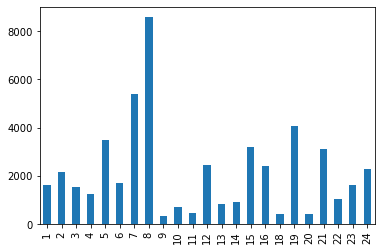

In [31]:
df_kmers['labels'].value_counts().sort_index().plot.bar()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)

(40000, 262113)
(10000, 262113)


Testing a Naive_Bayes Classifier

In [34]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted  chr1  chr2
Actual               
chr1       6912  1778
chr2        977   333
accuracy = 0.725 
precision = 0.782 
recall = 0.725 
f1 = 0.750
